<a href="https://colab.research.google.com/github/KGF2/DeepLearningAmateur/blob/master/FMNIST_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1) preprocess the data
# 2) build the nw
# 3) train the nw
# 4) analyse the results


In [0]:
import torch


In [2]:
import torchvision 
import torchvision.transforms as transforms

# extract raw data and convert to tensor
train_set = torchvision.datasets.FashionMNIST(
    root = './data'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([transforms.ToTensor()])
)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


In [3]:
import torch.nn as nn
import torch.nn.functional as F

# DQN

class DQNetwork (nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  def forward(self, tnsr):
    tnsr = F.relu(self.conv1(tnsr))
    tnsr = F.max_pool2d(tnsr, kernel_size=2, stride=2)
    tnsr = F.relu(self.conv2(tnsr))
    tnsr = F.max_pool2d(tnsr, kernel_size=2, stride=2)
    tnsr = tnsr.reshape([-1, 12*4*4])
    tnsr = F.relu(self.fc1(tnsr))
    tnsr = F.relu(self.fc2(tnsr))
    tnsr = self.out(tnsr)
    return tnsr

In [4]:
import torch.optim as optim

# Batch Training

DQN = DQNetwork()

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=100, shuffle=False)
optimiser = optim.Adagrad(DQN.parameters(), lr=0.01)

def get_num_correct(pred, labels):
  return pred.argmax(dim=1).eq(labels).sum().item()

for epoch in range(3):
  total_loss = 0
  total_correct = 0
  for batch in train_loader:
    images, labels = batch
    pred = DQN(images)
    loss = F.cross_entropy(pred, labels)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    total_loss += loss.item()
    total_correct += get_num_correct(pred, labels)
  print ("epoch : " + str(epoch+1) +"\t"+ "total_entropy_loss : " + str(total_loss) +"\t\t"+ "total_correct_predictions : " + str(total_correct))

epoch : 1	total_entropy_loss : 454.3040759265423		total_correct_predictions : 42655
epoch : 2	total_entropy_loss : 328.13236090540886		total_correct_predictions : 47722
epoch : 3	total_entropy_loss : 294.83375149965286		total_correct_predictions : 49165


In [5]:
# 4) Analyse the result


'import matplotlib.pyplot as plt\n\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import plot_confusion_matrix\n\ncm = confusion_matrix(train_set.targets, train_)'

In [6]:
# MNIST dataset

"""
import torchvision 
import torchvision.transforms as transforms

train_set_mnist = torchvision.datasets.MNIST(
    root = './data'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([transforms.ToTensor()])
)

train_loader_mnist = torchvision.utils.datasets 
"""

"\nimport torchvision \nimport torchvision.transforms as transforms\n\ntrain_set_mnist = torchvision.datasets.MNIST(\n    root = './data'\n    ,train = True\n    ,download = True\n    ,transform = transforms.Compose([transforms.ToTensor()])\n)\n\ntrain_loader_mnist = torchvision.utils.datasets \n"

In [14]:
# 4) Prediction result analysis

# confusion matrix -- 1st type

@torch.no_grad()
def get_all_preds(model, data_loader):
    all_preds = torch.tensor([])
    print(all_preds)
    for batch in data_loader:
        images, labels = batch
        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(DQN, prediction_loader)

preds_correct = get_num_correct(train_preds, train_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))


tensor([])
total correct: 49697
accuracy: 0.8282833333333334


In [27]:
stacked = torch.stack(
    (
        train_set.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)
print(train_set.targets.shape)
print(stacked.shape)
print(stacked)
print(stacked[0].tolist())

cmt = torch.zeros(10,10, dtype=torch.int32)
cmt

torch.Size([60000])
torch.Size([60000, 2])
tensor([[9, 9],
        [0, 0],
        [0, 3],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])
[9, 9]


tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [28]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1
cmt

tensor([[5098,   10,  206,  399,   31,    7,  164,    0,   85,    0],
        [   4, 5732,   35,  192,   18,    1,   16,    0,    2,    0],
        [  73,   10, 4804,   72,  725,    4,  220,    1,   91,    0],
        [ 181,   44,  106, 5421,  151,    4,   71,    0,   21,    1],
        [  15,   13,  797,  302, 4537,    3,  270,    0,   62,    1],
        [   3,    3,    0,    2,    0, 5595,    0,  263,   39,   95],
        [1455,   11, 1665,  279,  837,    2, 1601,    0,  149,    1],
        [   0,    0,    0,    0,    0,  167,    0, 5526,   13,  294],
        [  35,    4,   86,   42,   19,   32,   57,   21, 5698,    6],
        [   1,    0,    3,    1,    0,   58,    0,  243,    9, 5685]],
       dtype=torch.int32)

In [10]:
# Built-in confusion matrix -- 2nd type

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5098,   10,  206,  399,   31,    7,  164,    0,   85,    0],
       [   4, 5732,   35,  192,   18,    1,   16,    0,    2,    0],
       [  73,   10, 4804,   72,  725,    4,  220,    1,   91,    0],
       [ 181,   44,  106, 5421,  151,    4,   71,    0,   21,    1],
       [  15,   13,  797,  302, 4537,    3,  270,    0,   62,    1],
       [   3,    3,    0,    2,    0, 5595,    0,  263,   39,   95],
       [1455,   11, 1665,  279,  837,    2, 1601,    0,  149,    1],
       [   0,    0,    0,    0,    0,  167,    0, 5526,   13,  294],
       [  35,    4,   86,   42,   19,   32,   57,   21, 5698,    6],
       [   1,    0,    3,    1,    0,   58,    0,  243,    9, 5685]])

Confusion matrix, without normalization
[[5098   10  206  399   31    7  164    0   85    0]
 [   4 5732   35  192   18    1   16    0    2    0]
 [  73   10 4804   72  725    4  220    1   91    0]
 [ 181   44  106 5421  151    4   71    0   21    1]
 [  15   13  797  302 4537    3  270    0   62    1]
 [   3    3    0    2    0 5595    0  263   39   95]
 [1455   11 1665  279  837    2 1601    0  149    1]
 [   0    0    0    0    0  167    0 5526   13  294]
 [  35    4   86   42   19   32   57   21 5698    6]
 [   1    0    3    1    0   58    0  243    9 5685]]


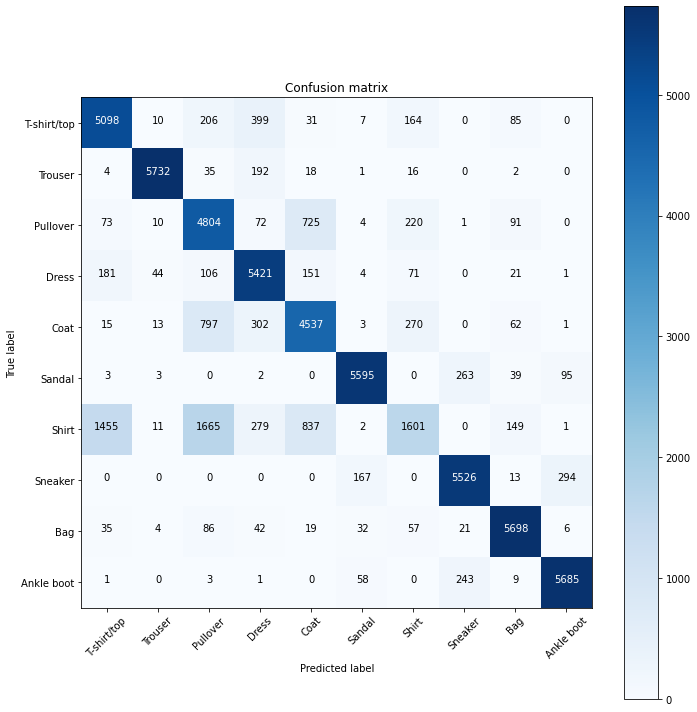

In [29]:
# for plotting in graph

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, names)